In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg

from scipy.linalg import toeplitz

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') 
plt.rcParams.update({'font.size':14})
plt.rcParams["font.family"] = "Times New Roman"

## The matrix inverse

In [2]:
A = np.array([[1,4], [2,7]])

Ainv = np.linalg.inv(A)

A@Ainv

array([[1., 0.],
       [0., 1.]])

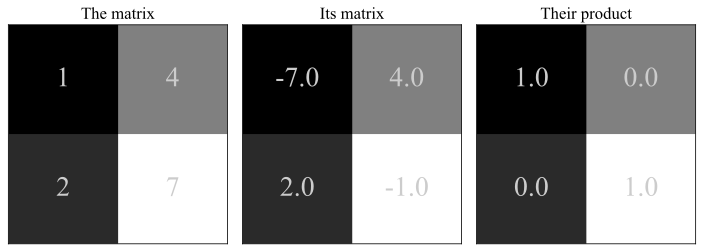

In [3]:
fig, axs = plt.subplots(1,3, figsize=(10,6))

axs[0].imshow(A,cmap='gray')
axs[0].set_title('The matrix')
for (j, i), num in np.ndenumerate(A):
    axs[0].text(i,j,num, color=[.8, .8, .8], ha='center', va='center', fontsize=28)

axs[1].imshow(A,cmap='gray')
axs[1].set_title('Its matrix')
for (j, i), num in np.ndenumerate(Ainv):
    axs[1].text(i,j,num, color=[.8, .8, .8], ha='center', va='center', fontsize=28) # 결과 : 실수(역행렬 계산 결과에 행렬식이 분수로 곱해지기 때문)

# their product
AAi = A@Ainv
axs[2].imshow(A,cmap='gray')
axs[2].set_title('Their product')
for (j, i), num in np.ndenumerate(AAi):
    axs[2].text(i,j,num, color=[.8, .8, .8], ha='center', va='center', fontsize=28)

# common properties
for i in range(3):
    axs[i].set_xticks([])
    axs[i].set_yticks([])

plt.tight_layout()
plt.savefig('Figure_07_01.png', dpi=600)
plt.show()

# The left-inverse

In [4]:
T = np.random.randint(-10, 11, size=(40, 4))

print(f'This matrix has rank={np.linalg.matrix_rank(T)}\n\n')

TtT = T.T@T #(4,40)*(40,4) 이므로 결과는 (4,4) 행렬 = 정방 행렬

TtT_inv = np.linalg.inv(TtT) #(4,4)
print(np.round(TtT_inv@TtT,4)) # 단위 행렬

This matrix has rank=4


[[ 1.  0.  0. -0.]
 [-0.  1.  0.  0.]
 [ 0. -0.  1. -0.]
 [ 0.  0. -0.  1.]]


In [5]:
L = TtT_inv @ T.T #(4,4) * (4,40) => (4,40) 행렬
 
print(np.round(L@T, 6)), print('  ') # (4,4)

print(np.round(T@L, 6)) # (40,40)

# 결과 해석 : T는 열이 적고 행이 많아서(40,4) 즉, 정방행렬이 아니므로 역행렬을 가질 수 없음 => 따라서 좌측 역행렬(L)만 정의할 수 있고 우측 역행렬은 정의할 수 없다.


[[ 1.  0.  0. -0.]
 [-0.  1. -0.  0.]
 [ 0. -0.  1.  0.]
 [ 0.  0.  0.  1.]]
  
[[ 0.105955 -0.062574  0.072812 ... -0.011641 -0.106558  0.013636]
 [-0.062574  0.134978 -0.06283  ... -0.079267  0.053937  0.048437]
 [ 0.072812 -0.06283   0.108299 ...  0.021293 -0.009478 -0.048406]
 ...
 [-0.011641 -0.079267  0.021293 ...  0.107141  0.050721 -0.060099]
 [-0.106558  0.053937 -0.009478 ...  0.050721  0.189876 -0.071053]
 [ 0.013636  0.048437 -0.048406 ... -0.060099 -0.071053  0.073959]]


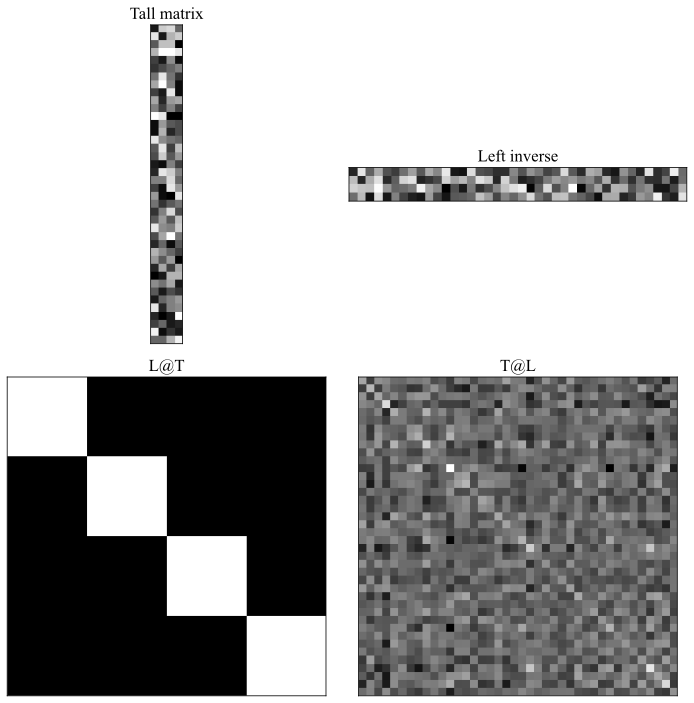

In [6]:
fig, axs = plt.subplots(2,2, figsize=(10,10))


axs[0,0].imshow(T, cmap='gray')
axs[0,0].set_title('Tall matrix')

axs[0,1].imshow(L, cmap='gray')
axs[0,1].set_title('Left inverse')

axs[1,0].imshow(L@T, cmap='gray')
axs[1,0].set_title('L@T')

axs[1,1].imshow(T@L, cmap='gray')
axs[1,1].set_title('T@L')

for a in axs.flatten():
    a.set_xticks([])
    a.set_yticks([])

plt.tight_layout()
plt.savefig('Figure_07_02.png', dpi=600)
plt.show()

# MP pseudo inverse (무어 펜로즈 의사 역행렬)

In [7]:
A = np.array([[1,4], [2,8]])

Apinv = np.linalg.pinv(A)
print(Apinv*85), print(' ') # 행렬값을 보기 편하게 변경하기 위해 85 배율 사용

A@Apinv

[[1. 2.]
 [4. 8.]]
 


array([[0.2, 0.4],
       [0.4, 0.8]])

The rank of this matrix is 5.



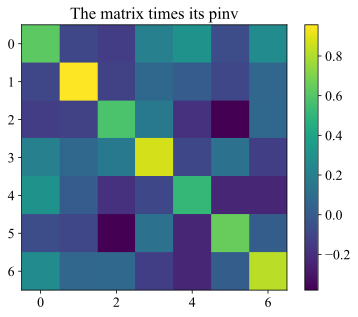

In [8]:
A = np.random.randn(7,5) @ np.random.randn(5,7)

print(f'The rank of this matrix is {np.linalg.matrix_rank(A)}.\n') # 최대 랭크는 5이다.

Apinv = np.linalg.pinv(A) # A가 full-rank(모두 선형 독립)가 아니므로 일반적인 역행렬은 존재하지 않고 대신, pseudo inverse 사용

plt.imshow(A@Apinv) #완벽한 단위행렬은 아님
plt.title('The matrix times its pinv')
plt.colorbar()
plt.show()

## Exercise 1

In [9]:
n = 5

A = np.random.randn(n,n)

Ai = np.linalg.inv(A)
Aii = np.linalg.inv(Ai) #역행렬의 역행렬은 자기 자신(A)

np.round(A-Aii, 10)

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0., -0., -0., -0., -0.],
       [-0.,  0.,  0.,  0.,  0.],
       [ 0., -0., -0., -0., -0.],
       [ 0., -0., -0.,  0.,  0.]])

## Exercise 2

In [10]:
m = 4
A = np.random.randn(m,m)

M = np.zeros((m,m))
G = np.zeros((m,m))

for i in range(m):
    for j in range(m):

        rows = [True]*m #True가 m개 있는 리스트 생성 
        rows[i] = False  # i번째 행 삭제(submatrix 만들기)

        cols = [True]*m #True가 m개 있는 리스트 생성 
        cols[j] = False  # j번째 행 삭제

        M[i,j] = np.linalg.det(A[rows, :][:, cols]) # rows, cols 모두 True인 것만 선택 -> (i,j)를 제거한 (m-1) x (m-1) 행렬 생성 후 행렬식 계산
        G[i,j] = (-1)**(i+j) # 부호 결정

C = M * G

Ainv = C.T / np.linalg.det(A) # 역행렬 계산 

AinvI = np.linalg.inv(A) # 기본 함수로 역행렬 계산(Ainv 와 결과 동일)

np.round(AinvI-Ainv, 8)


array([[-0., -0., -0., -0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

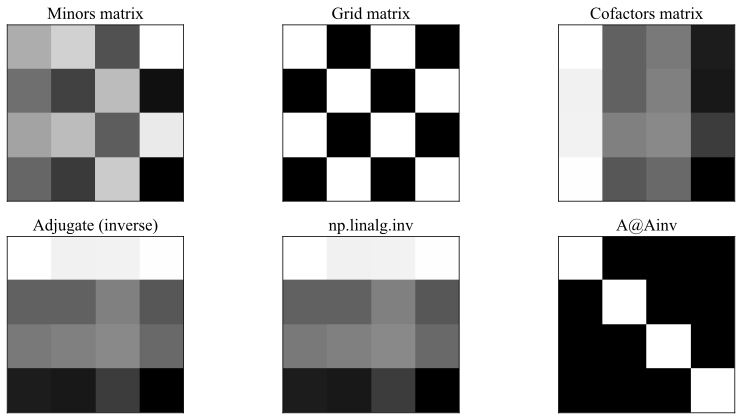

In [11]:
fig, axs = plt.subplots(2,3, figsize=(14,7))

axs[0,0].imshow(M, cmap='gray')
axs[0,0].set_title('Minors matrix') # 소행렬

axs[0,1].imshow(G, cmap='gray')
axs[0,1].set_title('Grid matrix') # 격자 행렬

axs[0,2].imshow(C, cmap='gray')
axs[0,2].set_title('Cofactors matrix') # 여인수 행렬

axs[1,0].imshow(Ainv, cmap='gray')
axs[1,0].set_title('Adjugate (inverse)') #수반 행렬(역행렬 = 원래 행렬의 행렬식의 역수를 스칼라 곱셈한 것)

axs[1,1].imshow(AinvI, cmap='gray')
axs[1,1].set_title('np.linalg.inv') # 역행렬(함수 사용)

axs[1,2].imshow(A@Ainv, cmap='gray')
axs[1,2].set_title('A@Ainv') # 원래 행렬과 역행렬의 곱 = 단위 행렬 

for a in axs.flatten():
    a.set_xticks([])
    a.set_yticks([])

plt.savefig('Figure_07_03.png', dpi=600)
plt.show()

## Exercise 4

In [12]:
W = np.random.randint(-10, 11, size=(4,40))

print(f'This matrix has rank={np.linalg.matrix_rank(W)}\n\n')

WWt = W@W.T # (4,4)

WWt_inv = np.linalg.inv(WWt) #(4,4)
print(np.round(WWt_inv@WWt, 4)) #원래 행렬과 역행렬의 곱 = 단위 행렬

This matrix has rank=4


[[ 1.  0.  0. -0.]
 [-0.  1. -0. -0.]
 [-0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]


In [13]:
R = W.T @ WWt_inv #(40,4)

print(np.round(W@R, 6)), print('  ') # 단위 행렬 (4,4) => 넓은 행렬이므로 오른쪽 역행렬만 존재
print(np.round(R@W, 6)) # (40,40) but 항상 단위 행렬이 아님(W가 열이 더 많은 넓은 행렬이기 때문에 왼쪽 역행렬은 존재하지 않음)

[[ 1.  0.  0. -0.]
 [ 0.  1.  0. -0.]
 [ 0. -0.  1.  0.]
 [ 0.  0.  0.  1.]]
  
[[ 0.117631  0.066057 -0.024933 ...  0.047325  0.034885  0.000171]
 [ 0.066057  0.056504  0.035888 ...  0.024975  0.027536  0.009658]
 [-0.024933  0.035888  0.152144 ... -0.000952  0.043168  0.046528]
 ...
 [ 0.047325  0.024975 -0.000952 ...  0.076977  0.012836 -0.031903]
 [ 0.034885  0.027536  0.043168 ...  0.012836  0.072279  0.060687]
 [ 0.000171  0.009658  0.046528 ... -0.031903  0.060687  0.0758  ]]


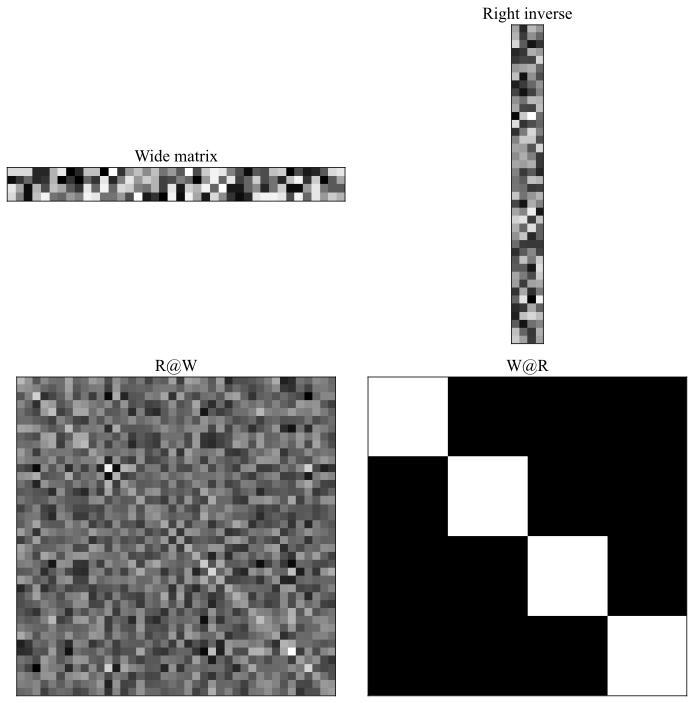

In [14]:
fig, axs = plt.subplots(2,2, figsize=(10,10))

axs[0,0].imshow(W, cmap='gray')
axs[0,0].set_title('Wide matrix') # 소행렬

axs[0,1].imshow(R, cmap='gray')
axs[0,1].set_title('Right inverse') # 격자 행렬

axs[1,0].imshow(R@W, cmap='gray')
axs[1,0].set_title('R@W') #수반 행렬(역행렬 = 원래 행렬의 행렬식의 역수를 스칼라 곱셈한 것)

axs[1,1].imshow(W@R, cmap='gray')
axs[1,1].set_title('W@R') # 역행렬(함수 사용)

for a in axs.flatten():
    a.set_xticks([])
    a.set_yticks([])

plt.tight_layout()
plt.show()

## Exercise 5

In [15]:
# Full inverse case

M = 4

A = np.random.randn(M,M)

Ainv = np.linalg.inv(A)
Apinv = np.linalg.pinv(A)

np.round(Ainv-Apinv, 10)

# 결과 해석 : 가역 행렬(A)의 완전 역행렬(Ainv)와 의사 역행렬(Apinv)은 같다.

array([[ 0., -0.,  0.,  0.],
       [-0.,  0.,  0., -0.],
       [ 0.,  0., -0.,  0.],
       [ 0., -0.,  0.,  0.]])

In [16]:
# left inverse case

M, N = 14,4

A = np.random.randn(M,N) # (14,4)

ALeft = np.linalg.inv(A.T@A) @ A.T #(4,4) @ (4,14) = (4,14) 
Apinv = np.linalg.pinv(A)

np.round(ALeft-Apinv, 10)

# 행 개수 > 열 개수인 높은 행렬의 의사 역행렬(Apinv)은 왼쪽 역행렬(ALeft)과 같다.

array([[-0., -0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0., -0.,
         0.],
       [ 0.,  0.,  0., -0., -0., -0.,  0.,  0., -0.,  0., -0., -0.,  0.,
        -0.],
       [ 0.,  0.,  0., -0., -0.,  0.,  0., -0.,  0.,  0.,  0., -0.,  0.,
        -0.],
       [ 0., -0., -0., -0., -0.,  0., -0., -0.,  0.,  0.,  0., -0., -0.,
        -0.]])

In [17]:
# right inverse case

M, N = 4, 14

A = np.random.randn(M, N) #(4,14)

ARight = A.T @ np.linalg.inv(A@A.T) #(14,4) @ ()
Apinv = np.linalg.pinv(A)

np.round(ARight-Apinv, 10)

# 행 개수 < 열 개수인 넓은 행렬의 의사 역행렬(Apinv)은 오른쪽 역행렬(ALeft)과 같다.

array([[ 0., -0.,  0., -0.],
       [-0.,  0., -0.,  0.],
       [ 0., -0.,  0.,  0.],
       [-0., -0.,  0.,  0.],
       [-0., -0.,  0.,  0.],
       [-0.,  0., -0., -0.],
       [ 0., -0., -0., -0.],
       [-0.,  0., -0., -0.],
       [-0.,  0., -0., -0.],
       [ 0.,  0., -0.,  0.],
       [ 0., -0.,  0., -0.],
       [ 0.,  0., -0.,  0.],
       [ 0., -0.,  0.,  0.],
       [-0.,  0.,  0.,  0.]])

## Exercise 6

In [21]:
N = 4
A = np.random.randn(N,N)
B = np.random.randn(N,N)

op1 = np.linalg.inv(A@B)
op2 = np.linalg.inv(A) @ np.linalg.inv(B)
op3 = np.linalg.inv(B) @ np.linalg.inv(A)

dist12 = np.sqrt(np.sum((op1-op2)**2)) # op1, op2 간 거리
dist13 = np.sqrt(np.sum((op1-op3)**2)) # op1, op3 간 거리

print(f'Distance between (AB)^-1 and (A^-1)(B^-1) is {dist12:.8f}') 
print(f'Distance between (AB)^-1 and (B^-1)(A^-1) is {dist13:.8f}') # (AB)의 역행렬과 같으므로 결과는 0


Distance between (AB)^-1 and (A^-1)(B^-1) is 4.10838582
Distance between (AB)^-1 and (B^-1)(A^-1) is 0.00000000


## Exercise 7

In [23]:
M, N = 14,4
T = np.random.randn(M,N)

op1 = np.linalg.inv(T.T@T)
op2 = np.linalg.inv(T) @ np.linalg.int(T.T)

dist12 = np.sqrt(np.sum((op1-op2)**2))
dist12 # 결과 -> 오류 발생(행>열 인 높은 행렬이기 때문에 역행렬이 존재하지 않음)

LinAlgError: Last 2 dimensions of the array must be square

## Exercise 8

/var/folders/gq/7sc0y6j114d07x_3j_7kw52h0000gn/T/ipykernel_2419/4158976083.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "rx" (-> color='r'). The keyword argument will take precedence.
  plt.plot(backTransformed[0, :], backTransformed[1,:], 'rx', markersize=15, color=[.7, .7, .7], label='Inverse-transformed')


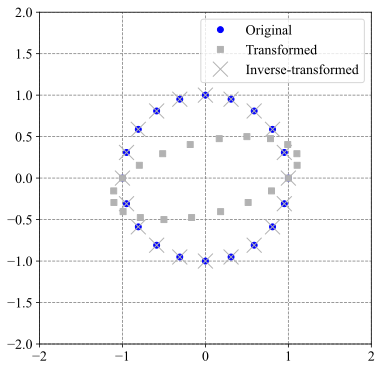

In [28]:
T = np.array([
                [1,.5],
                [0,.5]
            ])

Ti = np.linalg.inv(T)

theta = np.linspace(0, 2*np.pi-2*np.pi/20, 20) #0~2pi까지 20등분한 각도 배열
origPoints = np.vstack((np.cos(theta), np.sin(theta))) #x좌표 : cos, y좌표 : sin

transformedPoints = T @ origPoints #변환행렬 T를 적용하여 찌그러진 원이 나옴

backTransformed = Ti @ transformedPoints #원래대로 복구

plt.figure(figsize=(6,6))
plt.plot(origPoints[0,:], origPoints[1,:], 'bo', label='Original')
plt.plot(transformedPoints[0,:], transformedPoints[1,:], 's', color=[.7, .7, .7], label='Transformed')
plt.plot(backTransformed[0, :], backTransformed[1,:], 'rx', markersize=15, color=[.7, .7, .7], label='Inverse-transformed')

plt.axis('square')
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.legend()
plt.savefig('Figure_07_05.png', dpi=600)
plt.grid(color='gray', linestyle='--')
plt.show()

## Exercise 9

In [29]:
# 수치적으로 불안정한 행렬(힐버트 행렬)

def hilbmat(k):
    H = np.zeros((k,k))
    for i in range(k):
        for j in range(k):

            H[i,j] = 1 / (i+j+1) # 원래 힐버트 행렬 분모는 i+j-1(단, i,j는 1부터 시작) 인데, 실제 i,j는 0부터 시작하므로, i와 j에 1씩 더한 값으로 계산하면 -> (i+1) + (j+1) -1 = i+j+1
    return H         

def hilbmat(k): # 위와 동일한 결과(반복 없이 계산하는 방법)
    k = np.arange(1, k+1).reshape(1,-1) # 1~k까지 숫자 생성 후 (1×k) row vector로 reshape
    return 1 / (k.T + k -1) # 외적 - k.T(k*1=column vector)에 k 더하기 = 브로드캐스팅으로 i+j 생성 후 -1을 하여 본래 (i+j+1) 분모 생성


In [32]:
print(hilbmat(5)), print('  ')

from scipy.linalg import hilbert # math 모듈 사용 방법(결과 동일)
print(hilbert(5))

[[1.         0.5        0.33333333 0.25       0.2       ]
 [0.5        0.33333333 0.25       0.2        0.16666667]
 [0.33333333 0.25       0.2        0.16666667 0.14285714]
 [0.25       0.2        0.16666667 0.14285714 0.125     ]
 [0.2        0.16666667 0.14285714 0.125      0.11111111]]
  
[[1.         0.5        0.33333333 0.25       0.2       ]
 [0.5        0.33333333 0.25       0.2        0.16666667]
 [0.33333333 0.25       0.2        0.16666667 0.14285714]
 [0.25       0.2        0.16666667 0.14285714 0.125     ]
 [0.2        0.16666667 0.14285714 0.125      0.11111111]]


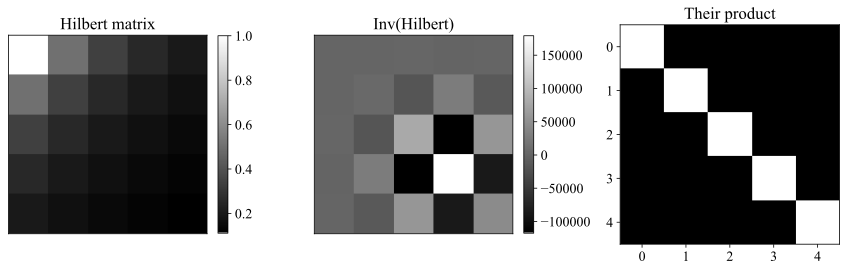

In [33]:
H = hilbmat(5)
Hi = np.linalg.inv(H)

fig, axs = plt.subplots(1, 3, figsize=(12, 6))
h = [0,0,0]

h[0] = axs[0].imshow(H, cmap='gray')
axs[0].set_title('Hilbert matrix')

h[1] = axs[1].imshow(Hi, cmap='gray')
axs[1].set_title('Inv(Hilbert)')

h[2] = axs[2].imshow(H@Hi, cmap='gray')
axs[2].set_title('Their product')

for i in range(2):
    fig.colorbar(h[i], ax=axs[i], fraction=.045)
    axs[i].set_xticks([])
    axs[i].set_yticks([])

plt.tight_layout()
plt.savefig('Figure_07_06.png', dpi=600)
plt.show()

## Exercise 10

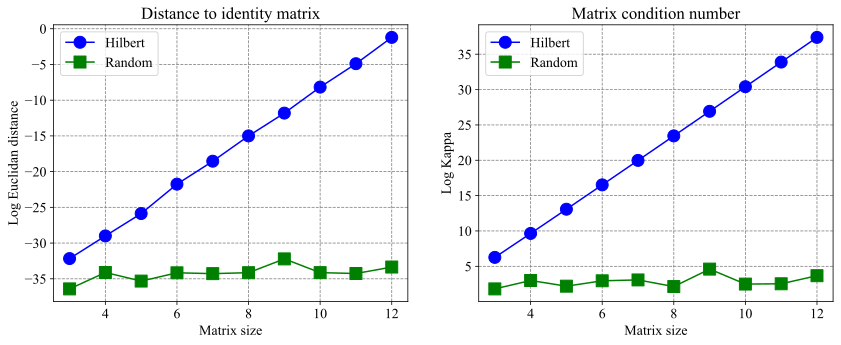

In [44]:
#힐버트는 얼마나 수치적으로 나쁜지? , 랜덤 행렬은 상대적으로 어떤지? → 이걸 실험하는 코드

matSizes = np.arange(3,13)

identityError = np.zeros((len(matSizes), 2))
condNumbers = np.zeros((len(matSizes), 2))

for i,k in enumerate(matSizes):

    ### for the Hilbert matrix
    H = hilbmat(k)
    Hi = np.linalg.inv(H)
    HHi = H@Hi #결과 : 단위행렬이어야 하지만 수치 오차때문에 약간 다름(오차 측정 => condNumbers)
    err = HHi - np.eye(k) #결과 : 0
    identityError[i,0] = np.sqrt(np.sum(err**2)) #유클라디안 거리
    condNumbers[i,0] = np.linalg.cond(H) #수치적 불안정성

    ### for the a random matrix
    H = np.random.randn(k,k)
    Hi = np.linalg.inv(H)
    HHi = H@Hi #결과 : 단위행렬
    err = HHi - np.eye(k) #결과 : 0
    identityError[i,1] = np.sqrt(np.sum(err**2)) #유클라디안 거리
    condNumbers[i,1] = np.linalg.cond(H) 


fig, axs = plt.subplots(1,2, figsize=(14,5))

h = axs[0].plot(matSizes, np.log(identityError), 's-', markersize=12) #수치 차이를 보기 쉽게 log로 스케일을 압축하여 시각화
h[0].set_color('blue')
h[0].set_marker('o')
h[1].set_color('green')

axs[0].legend(['Hilbert', 'Random'])
axs[0].set_xlabel('Matrix size')
axs[0].set_ylabel('Log Euclidan distance')
axs[0].set_title('Distance to identity matrix')

h = axs[1].plot(matSizes, np.log(condNumbers), 's-', markersize=12)
h[0].set_color('blue')
h[0].set_marker('o')
h[1].set_color('green')

axs[1].legend(['Hilbert', 'Random'])
axs[1].set_xlabel('Matrix size')
axs[1].set_ylabel('Log Kappa') # condition number의 다른 표현
axs[1].set_title('Matrix condition number')

plt.savefig('Figure_07_07.png', dpi=600)

for ax in axs:
    ax.grid(linestyle='--', color='gray')

plt.show()

#결과 해석
#hilbert는 점점 오류가 커진다

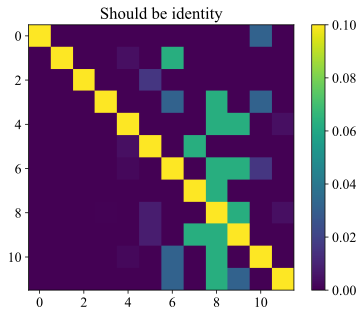

In [43]:
H = hilbmat(k)
Hi = np.linalg.inv(H)
HHi = H@Hi

plt.imshow(HHi, vmin=0, vmax=.1)
plt.title('Should be identity')
plt.colorbar()

# 단위행렬이 나와야 하지만 수치적 불안정성 때문에 완전한 단위행렬이 나오지는 않음 